In [1]:
# papermill parameters
zona = 31
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


In [2]:
# Parameters
zona = 39
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


### Importa las librerias

In [3]:

import sys
import os

# Añadir la carpeta raíz del proyecto al sys.path
sys.path.append(os.path.abspath(".."))

import importlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import src.utilidades as uti
import src.graficos as gra
import src.parametros_sismicos as par

from shapely.geometry import Point

importlib.reload(uti)
importlib.reload(par)
importlib.reload(gra)

<module 'src.graficos' from '/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/graficos.py'>

### Lectura del Dataframe

In [4]:
# Leer el DataFrame guardado

filename = f"datos_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename

gdf_2002 = pd.read_pickle(output_file)

gdf_2002.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 485 entries, 20372 to 141418
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Evento        485 non-null    object        
 1   Latitud       485 non-null    float64       
 2   Longitud      485 non-null    float64       
 3   Prof_Km       485 non-null    float64       
 4   Inten         485 non-null    object        
 5   Mag           485 non-null    float64       
 6   Tipo_Mag      485 non-null    Int64         
 7   Localizacion  485 non-null    object        
 8   FechaHora     485 non-null    datetime64[ns]
 9   Mag_mbLgL     485 non-null    float64       
 10  geometry      485 non-null    geometry      
 11  Zona_ID       485 non-null    float64       
dtypes: Int64(1), datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 49.7+ KB


## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Parámetros de la ley de Gutenberg–Richter (GR)

In [5]:

# Parámetros a y b para todo el catálogo
# Columna constante en todo el dataframe
gdf_2002_1_global,parametros_GR=uti.gutemberg_richter(gdf_2002, col_mag="Mag_mbLgL", min_mag=None)

print(parametros_GR)

# Evolución de los parámetros a y b (ventanas de 50 eventos)
gdf_2002_1 = par.gutemberg_richter_ventana(gdf_2002, col_mag="Mag_mbLgL", n_eventos=50)

gdf_2002_1.tail(15)

{'a_lsq_global': 3.9145339906791365, 'b_lsq_global': 0.9185751076587317, 'a_mlk_global': 2.8567734608266777, 'b_mlk_global': 0.34360616601050875}


,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk
141063,es2025pkskp,36.6714,-1.8655,0.0,,1.6,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-08 06:34:10,1.6,POINT (-1.8655 36.6714),39.0,2.911881,0.847239,2.321006,0.565488
141065,es2025plefy,36.6127,-1.8344,6.0,,1.9,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-08 12:32:24,1.9,POINT (-1.8344 36.6127),39.0,2.909414,0.851173,2.330880,0.574464
141072,es2025pmapu,36.6805,-1.9756,12.0,,1.7,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-08 23:50:40,1.7,POINT (-1.9756 36.6805),39.0,2.933062,0.858046,2.322630,0.566964
141095,es2025poxjv,36.6855,-1.9103,4.0,,2.3,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-10 13:36:42,2.3,POINT (-1.9103 36.6855),39.0,3.010576,0.893256,2.467633,0.640552
141103,es2025ppmmj,36.7126,-1.9780,14.0,,1.7,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-10 21:14:18,1.7,POINT (-1.978 36.7126),39.0,3.022546,0.894551,2.452082,0.627593
141150,es2025pvquf,36.7783,-2.0025,6.0,,2.3,4,SW CARBONERAS.AL,2025-08-14 06:12:40,2.3,POINT (-2.0025 36.7783),39.0,3.019544,0.894151,2.454265,0.629412
141152,es2025pvtaz,36.6409,-1.8770,13.0,,2.3,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-14 07:21:07,2.3,POINT (-1.877 36.6409),39.0,3.016136,0.888632,2.443475,0.620421
141157,es2025pwrkx,36.6325,-1.8202,0.0,,2.1,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-14 19:40:04,2.1,POINT (-1.8202 36.6325),39.0,3.006052,0.880473,2.435062,0.613410
141182,es2025pyymk,36.6025,-1.9337,16.0,,1.6,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-16 01:29:58,1.6,POINT (-1.9337 36.6025),39.0,3.035959,0.900610,2.445608,0.622198
141212,es2025qccqq,36.6346,-1.8975,18.0,,1.8,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-17 19:00:07,1.8,POINT (-1.8975 36.6346),39.0,3.029513,0.901951,2.456460,0.631242


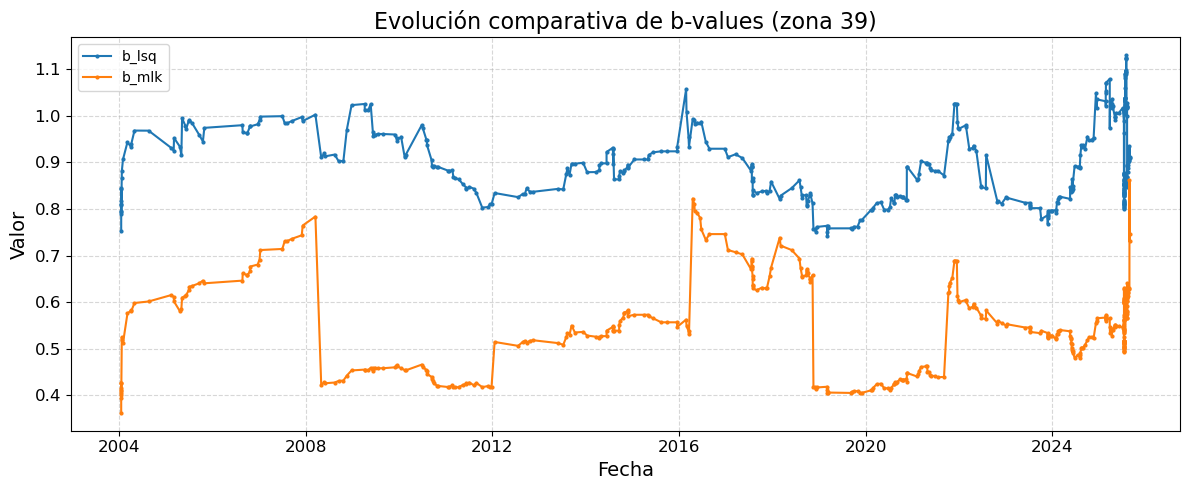

In [6]:
# Comparar evolución de b_lsq y b_mlk

filename = f"Evolución comparativa de b-values (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_1, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq", "b_mlk"], 
   output_file=output_file,
   titulo=filename
   
)

### 2. Tasa media de liberación de energía de Benioff

In [7]:
gdf_2002_2 = par.calcular_tasa_benioff_ventana_rapida(
    gdf_2002_1,
    col_mag="Mag_mbLgL",
    fecha_col="FechaHora",
    T=1.0  # ventana de 1 año
)

gdf_2002_2 .head()

,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk,Tasa_Benioff
20372,303619,37.0579,-1.6546,12.4,,1.9,2,MEDITERRÁNEO-CABO DE PALOS,2002-01-19 20:29:21,0.497755,POINT (-1.6546 37.0579),39.0,NaN,NaN,NaN,NaN,0.000000
20462,307588,37.4816,-1.2793,2.9,II,2.8,2,SE MAZARRÓN.MU,2002-02-03 21:50:43,1.620000,POINT (-1.2793 37.4816),39.0,NaN,NaN,NaN,NaN,593.357350
20936,328659,37.5098,-1.2404,6.1,,1.4,4,SE MAZARRÓN.MU,2002-04-29 00:29:56,1.400000,POINT (-1.2404 37.5098),39.0,NaN,NaN,NaN,NaN,4163.473246
20966,329143,37.2832,-1.6820,9.2,,1.6,4,SE PULPÍ.AL,2002-05-03 05:59:42,1.600000,POINT (-1.682 37.2832),39.0,NaN,NaN,NaN,NaN,5027.702439
21389,339551,37.9092,-0.4530,0.0,II,1.8,4,MEDITERRÁNEO-CABO DE PALOS,2002-07-18 05:28:23,1.800000,POINT (-0.453 37.9092),39.0,NaN,NaN,NaN,NaN,6413.012065


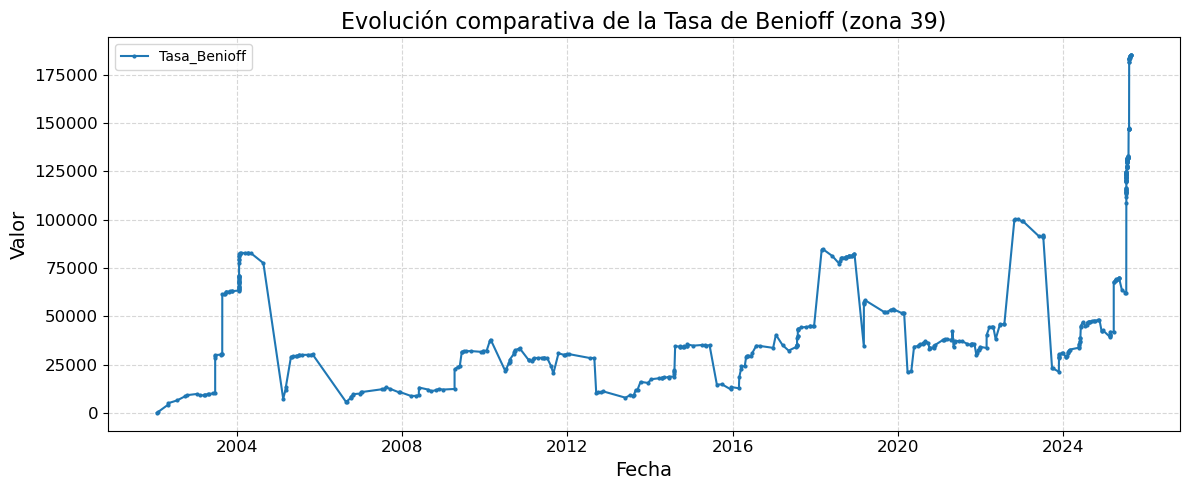

In [8]:
# Comparar evolución de la Tasa de Benioff
filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_2, 
   fecha_col="FechaHora", 
   param_cols=["Tasa_Benioff"], 
   output_file=output_file,
   titulo=filename
   
)

### 3. Tiempo de n eventos

In [9]:
gdf_2002_3 = par.tiempo_desde_evento_n_rapido(
    gdf_2002_2,
    n=50,                  # mirar 50 eventos atrás
    fecha_col="FechaHora",
    unidad="days",
    nueva_col="Tiempo_50_eventos"
)

gdf_2002_3[["FechaHora", "Tiempo_50_eventos"]].tail(15)


,FechaHora,Tiempo_50_eventos
141063,2025-08-08 06:34:10,23.684352
141065,2025-08-08 12:32:24,23.780347
141072,2025-08-08 23:50:40,24.183380
141095,2025-08-10 13:36:42,25.647431
141103,2025-08-10 21:14:18,25.945741
141150,2025-08-14 06:12:40,29.201655
141152,2025-08-14 07:21:07,29.028727
141157,2025-08-14 19:40:04,29.507326
141182,2025-08-16 01:29:58,30.558171
141212,2025-08-17 19:00:07,32.129688


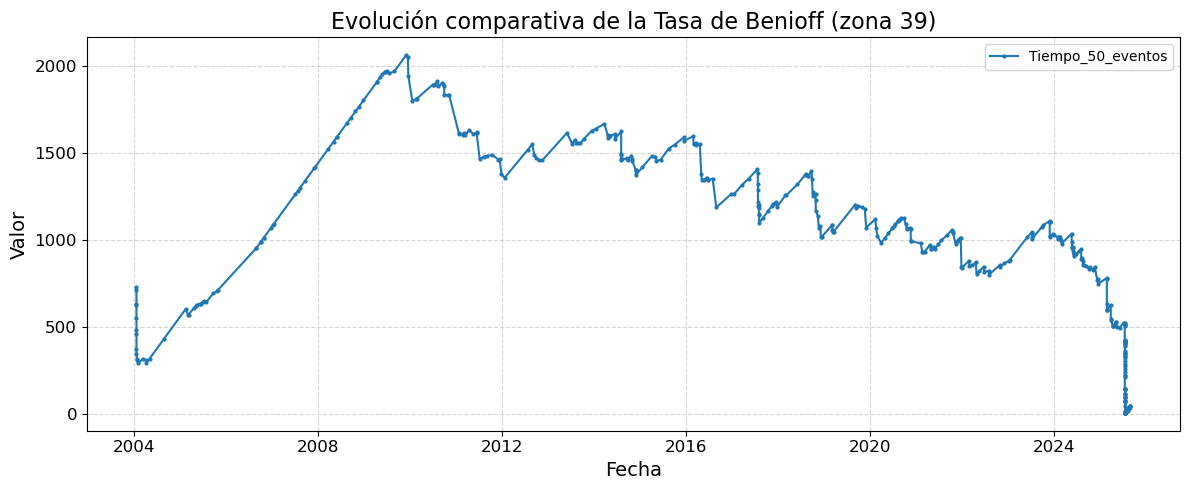

In [10]:
# Comparar evolución de Tiempo_50_eventos

filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_3, 
   fecha_col="FechaHora", 
   param_cols=["Tiempo_50_eventos"], 
   output_file=output_file,
   titulo=filename
       
)

### 4. Magnitud media en n eventos previos

In [11]:
gdf_2002_4 = par.magnitud_media_eventos_previos(
    gdf_2002_3,
    n=50,                     # mirar 50 eventos atrás
    col_mag="Mag_mbLgL",
    nueva_col="Mag_media_50"
)

gdf_2002_4[["FechaHora","Mag_mbLgL", "Mag_media_50"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_50
141063,2025-08-08 06:34:10,1.6,1.868
141065,2025-08-08 12:32:24,1.9,1.856
141072,2025-08-08 23:50:40,1.7,1.866
141095,2025-08-10 13:36:42,2.3,1.878
141103,2025-08-10 21:14:18,1.7,1.892
141150,2025-08-14 06:12:40,2.3,1.890
141152,2025-08-14 07:21:07,2.3,1.900
141157,2025-08-14 19:40:04,2.1,1.908
141182,2025-08-16 01:29:58,1.6,1.898
141212,2025-08-17 19:00:07,1.8,1.888


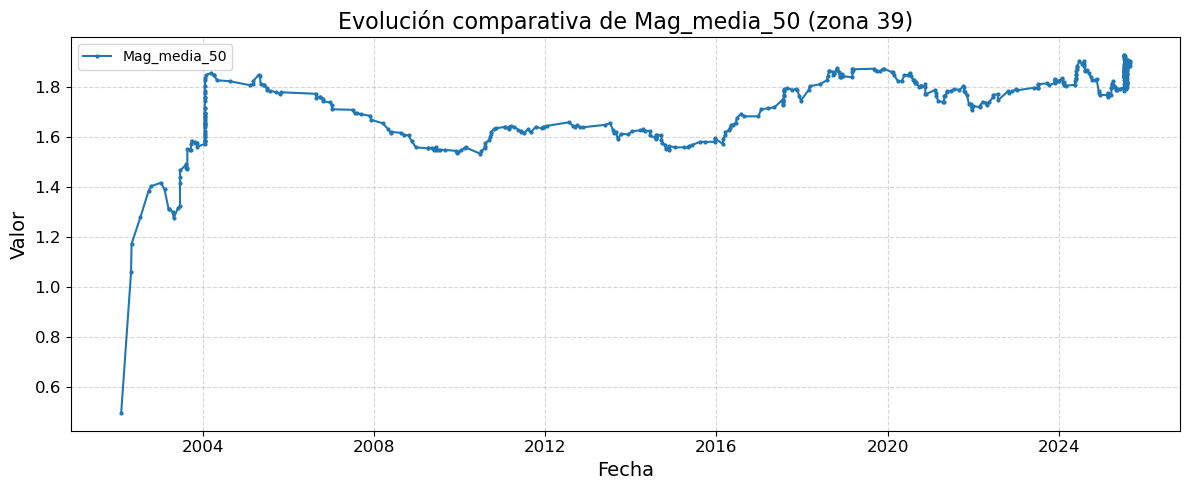

In [12]:
# Comparar evolución de Mag_media_50
filename = f"Evolución comparativa de Mag_media_50 (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_4, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_50"], 
   output_file=output_file,
   titulo=filename
   
)

### 5. Valor medio y desviación estándar de la magnitud en los últimos 30 días

In [13]:
gdf_2002_5 = par.estadisticas_magnitud_ventana(gdf_2002_4, fecha_col="FechaHora", mag_col="Mag_mbLgL", dias=30)

gdf_2002_5[["FechaHora", "Mag_mbLgL", "Mag_media_30d", "Mag_std_30d"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_30d,Mag_std_30d
470,2025-08-08 06:34:10,1.6,1.904598,0.425060
471,2025-08-08 12:32:24,1.9,1.904545,0.422611
472,2025-08-08 23:50:40,1.7,1.902247,0.420762
473,2025-08-10 13:36:42,2.3,1.906667,0.420487
474,2025-08-10 21:14:18,1.7,1.904396,0.418705
475,2025-08-14 06:12:40,2.3,1.873214,0.423617
476,2025-08-14 07:21:07,2.3,1.880702,0.423606
477,2025-08-14 19:40:04,2.1,1.901818,0.411182
478,2025-08-16 01:29:58,1.6,1.895833,0.424744
479,2025-08-17 19:00:07,1.8,1.893023,0.419975


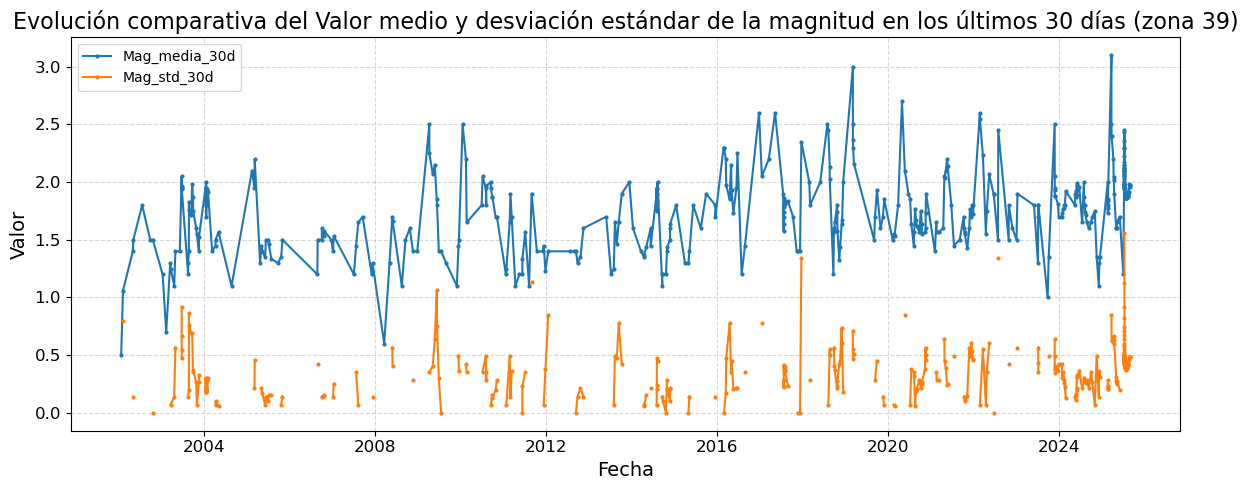

In [14]:
# Comparar evolución de Mag_media_30d y Mag_std_30d
filename = f"Evolución comparativa del Valor medio y desviación estándar de la magnitud en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_5, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_30d","Mag_std_30d"], 
   output_file=output_file,
   titulo=filename
)

### 6a. Cambios en la tasa sísmica (z-value)

In [15]:
gdf_2002_6a = par.calcular_z_value_vectorizado(
    gdf_2002_5, fecha_col="FechaHora", T=30, col_out="z_30d_eventos"
)

gdf_2002_6a[["FechaHora", "z_30d_eventos"]].tail(20)

,FechaHora,z_30d_eventos
465,2025-08-05 20:53:09,2.308940
466,2025-08-06 02:50:37,2.374539
467,2025-08-08 02:06:42,2.408677
468,2025-08-08 02:11:43,2.408677
469,2025-08-08 02:34:39,2.408677
470,2025-08-08 06:34:10,2.408677
471,2025-08-08 12:32:24,2.408677
472,2025-08-08 23:50:40,2.408677
473,2025-08-10 13:36:42,2.583078
474,2025-08-10 21:14:18,2.583078


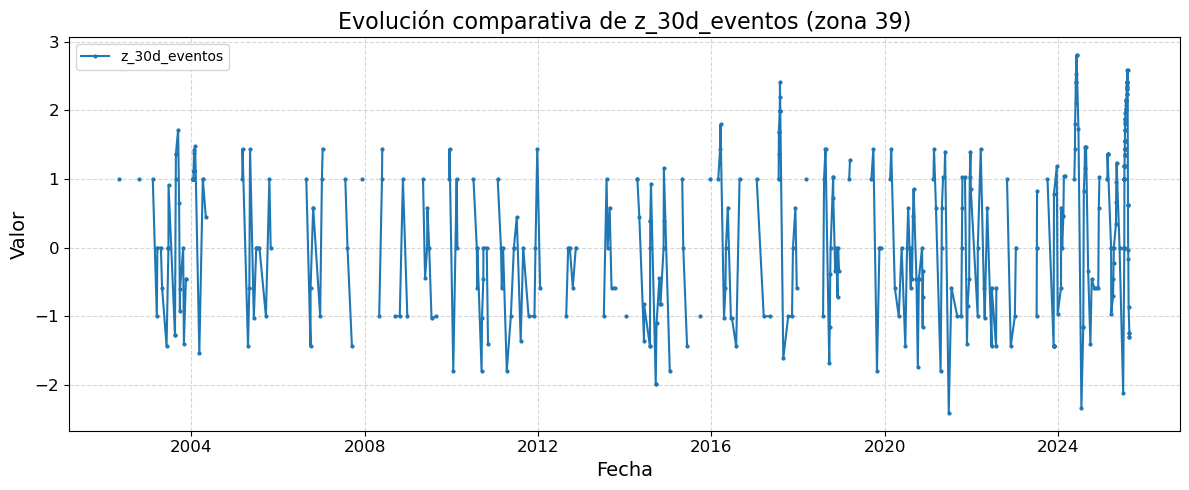

In [16]:
# Comparar evolución de z_30d_eventos
filename = f"Evolución comparativa de z_30d_eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6a, 
   fecha_col="FechaHora", 
   param_cols=["z_30d_eventos"], 
   output_file=output_file,
   titulo=filename
)

### 6b. Cambios en la tasa sísmica (beta-value)

In [17]:
gdf_2002_6b = par.calcular_beta_value(gdf_2002_6a, fecha_col="FechaHora", ventana_dias=30)

gdf_2002_6b[["FechaHora", "M_obs", "Beta_value"]].tail(15)


,FechaHora,M_obs,Beta_value
470,2025-08-08 06:34:10,89.0,67.329532
471,2025-08-08 12:32:24,89.0,67.329532
472,2025-08-08 23:50:40,89.0,67.329532
473,2025-08-10 13:36:42,91.0,68.871798
474,2025-08-10 21:14:18,91.0,68.871798
475,2025-08-14 06:12:40,53.0,39.568738
476,2025-08-14 07:21:07,53.0,39.568738
477,2025-08-14 19:40:04,53.0,39.568738
478,2025-08-16 01:29:58,45.0,33.399672
479,2025-08-17 19:00:07,42.0,31.086273


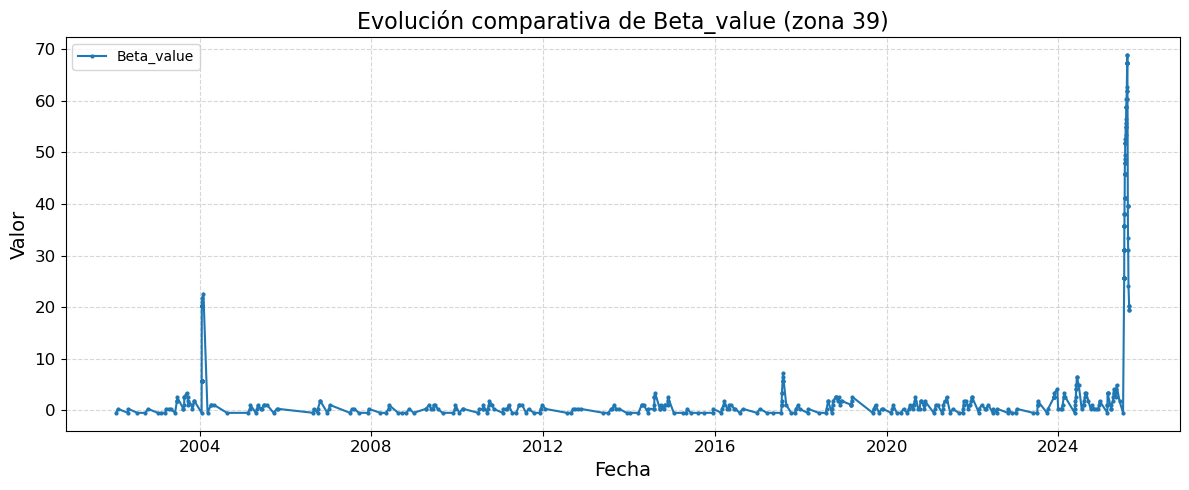

In [18]:
# Comparar evolución de Beta_value
filename = f"Evolución comparativa de Beta_value (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6b, 
   fecha_col="FechaHora", 
   param_cols=["Beta_value"], 
   output_file=output_file,
   titulo=filename
)

### 7. Magnitud máxima en los T días previos

In [19]:
# Calcular magnitud máxima en ventanas de 30, 90 y 180 días
gdf_2002_7 = par.agregar_magnitud_max_multiventana(
    gdf_2002_6b,
    fecha_col="FechaHora",
    mag_col="Mag_mbLgL",
    ventanas=[30, 90, 180]
)

# Verificar las nuevas columnas
gdf_2002_7[["FechaHora", "MagMax_30d", "MagMax_90d", "MagMax_180d"]].tail()


,FechaHora,MagMax_30d,MagMax_90d,MagMax_180d
480,2025-08-20 03:38:46,3.5,3.5,3.5
481,2025-08-26 09:02:44,3.5,3.5,3.5
482,2025-08-26 22:05:23,3.5,3.5,3.5
483,2025-08-27 00:26:25,3.5,3.5,3.5
484,2025-08-27 14:09:51,3.5,3.5,3.5


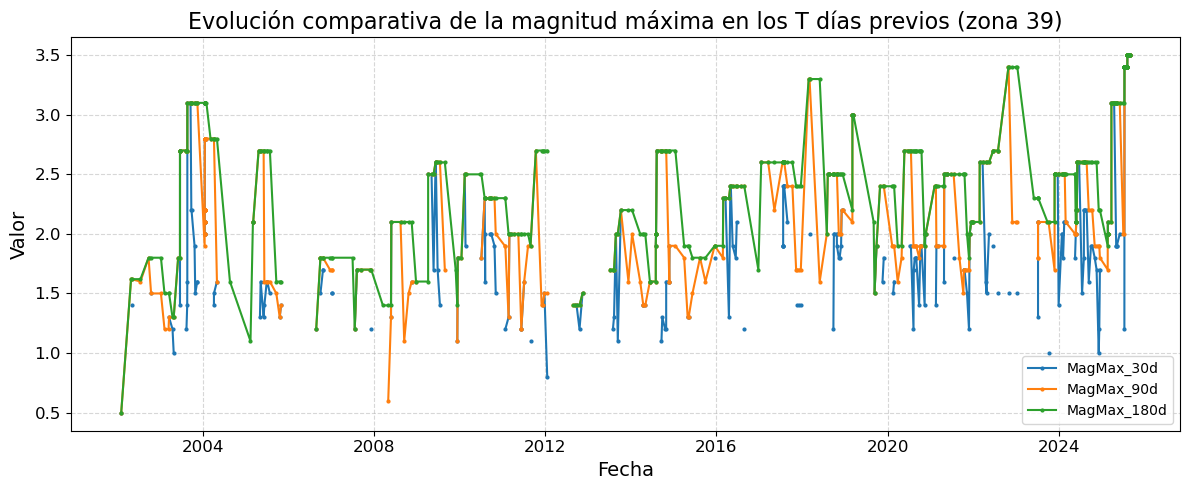

In [20]:
# Comparar evolución de la magnitud máxima en los T días previos

filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_7, 
   fecha_col="FechaHora", 
   param_cols=["MagMax_30d","MagMax_90d","MagMax_180d"], 
   output_file=output_file,
   titulo=filename
)

### 8. Profundidad media en los T días previos

In [21]:
# Calcular profundidad media en los últimos 30 días
gdf_2002_8 = par.agregar_profundidad_media_multiventana(gdf_2002_7, fecha_col="FechaHora", prof_col="Prof_Km", ventanas=[30])

# Verificar
gdf_2002_8[["FechaHora", "ProfMedia_30d"]].tail()


,FechaHora,ProfMedia_30d
480,2025-08-20 03:38:46,13.093750
481,2025-08-26 09:02:44,13.076923
482,2025-08-26 22:05:23,13.269231
483,2025-08-27 00:26:25,13.222222
484,2025-08-27 14:09:51,13.357143


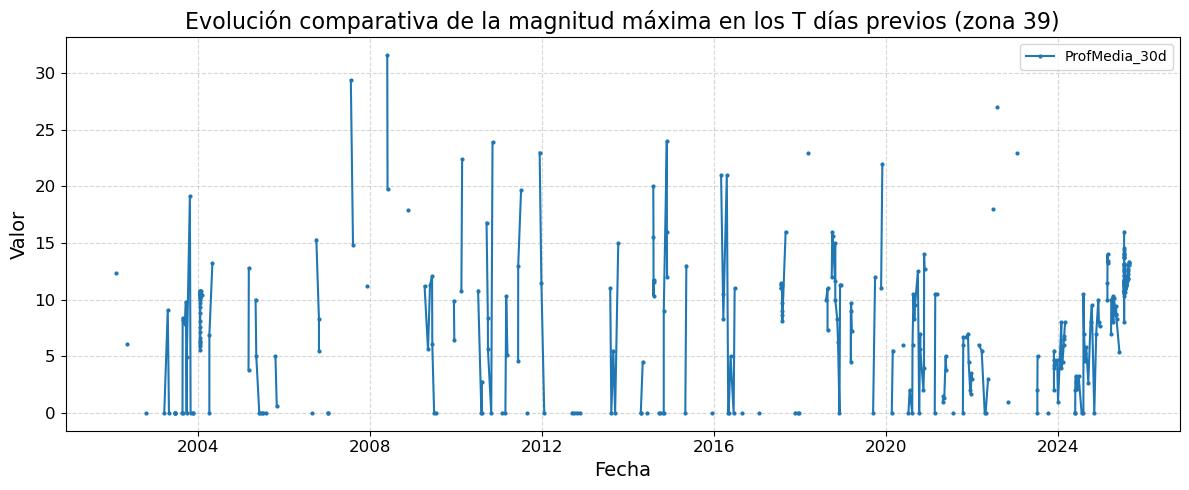

In [22]:
# Comparar evolución de la profundidad media en los T días previos
filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_8, 
   fecha_col="FechaHora", 
   param_cols=["ProfMedia_30d"], 
   output_file=output_file,
   titulo=filename
)

### 9. Tiempo desde el último terremoto

In [23]:
gdf_2002_9 = par.agregar_tiempo_desde_ultimo(gdf_2002_8, fecha_col="FechaHora", unidad="dias")

# Verificar
gdf_2002_9[["FechaHora", "TiempoDesdeUltimo"]].tail(15)


,FechaHora,TiempoDesdeUltimo
470,2025-08-08 06:34:10,0.166331
471,2025-08-08 12:32:24,0.248773
472,2025-08-08 23:50:40,0.471019
473,2025-08-10 13:36:42,1.573634
474,2025-08-10 21:14:18,0.317778
475,2025-08-14 06:12:40,3.373866
476,2025-08-14 07:21:07,0.047535
477,2025-08-14 19:40:04,0.513160
478,2025-08-16 01:29:58,1.242986
479,2025-08-17 19:00:07,1.729271


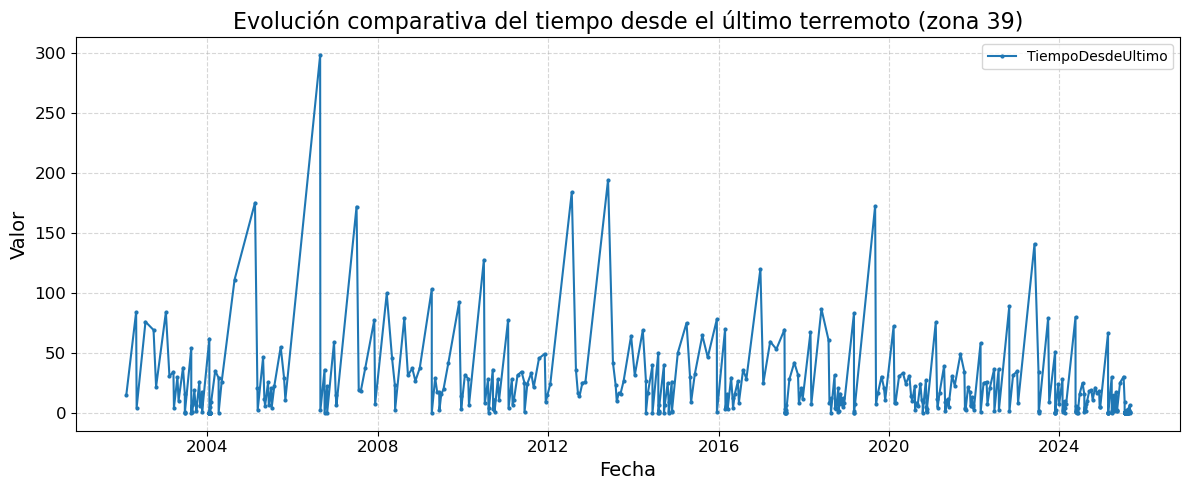

In [24]:
# Comparar evolución del tiempo desde el último terremoto 
filename = f"Evolución comparativa del tiempo desde el último terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_9, 
   fecha_col="FechaHora", 
   param_cols=["TiempoDesdeUltimo"], 
   output_file=output_file,
   titulo=filename
)

### 10. Tiempo transcurrido entre los últimos n eventos

In [25]:
# Calcular tiempo transcurrido entre el primer y último de los 5 eventos previos
gdf_2002_10 = par.agregar_tiempo_ventana_eventos_vector(gdf_2002_9, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_10[["FechaHora", "TiempoVentana_5Eventos"]].tail(10)

/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:883: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoVentana_5Eventos
475,2025-08-14 06:12:40,5.736296
476,2025-08-14 07:21:07,5.312812
477,2025-08-14 19:40:04,4.252338
478,2025-08-16 01:29:58,5.177546
479,2025-08-17 19:00:07,3.532951
480,2025-08-20 03:38:46,5.845590
481,2025-08-26 09:02:44,11.557407
482,2025-08-26 22:05:23,10.857928
483,2025-08-27 00:26:25,9.226597
484,2025-08-27 14:09:51,7.438252


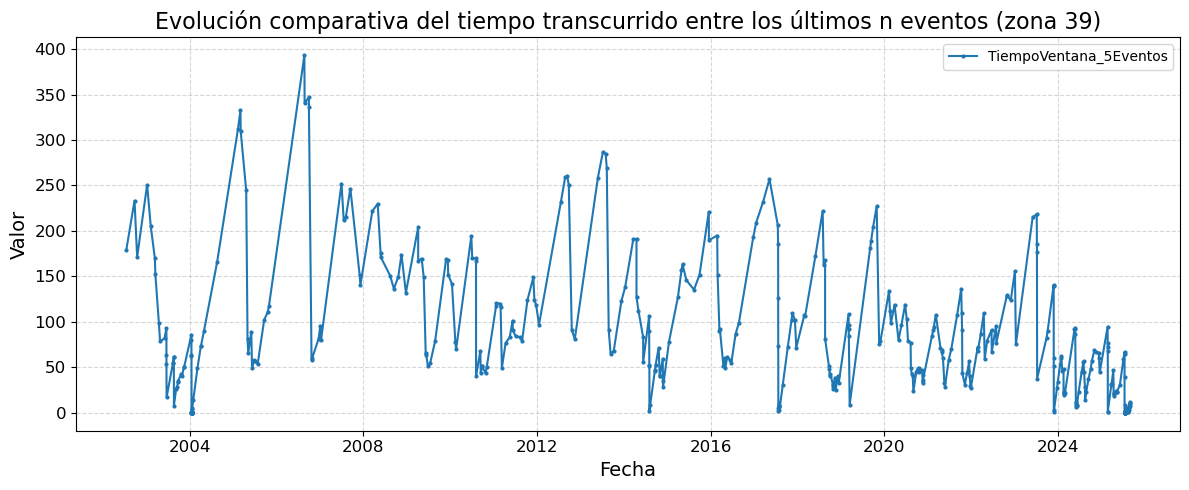

In [26]:
# Comparar evolución del tiempo transcurrido entre los últimos n eventos
filename = f"Evolución comparativa del tiempo transcurrido entre los últimos n eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_10, 
   fecha_col="FechaHora", 
   param_cols=["TiempoVentana_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 11. Tiempo medio entre eventos

In [27]:
# Calcular tiempo medio entre eventos de los últimos 5 eventos
gdf_2002_11 = par.agregar_tiempo_medio_ventana_eventos(gdf_2002_10, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_11[["FechaHora", "TiempoMedio_5Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:947: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoMedio_5Eventos
475,2025-08-14 06:12:40,1.434074
476,2025-08-14 07:21:07,1.328203
477,2025-08-14 19:40:04,1.063084
478,2025-08-16 01:29:58,1.294387
479,2025-08-17 19:00:07,0.883238
480,2025-08-20 03:38:46,1.461398
481,2025-08-26 09:02:44,2.889352
482,2025-08-26 22:05:23,2.714482
483,2025-08-27 00:26:25,2.306649
484,2025-08-27 14:09:51,1.859563


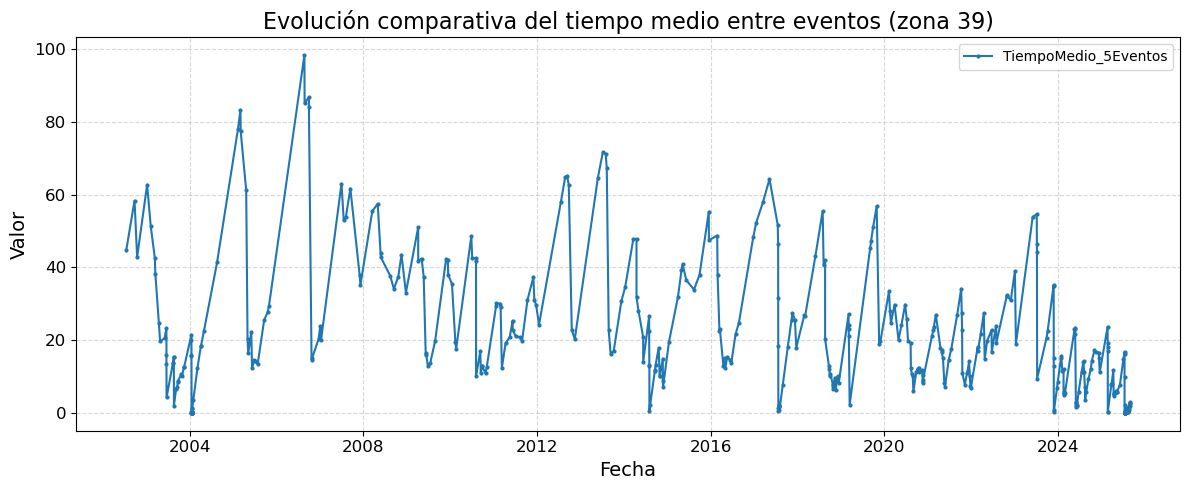

In [28]:
# Comparar evolución del tiempo medio entre eventos
filename = f"Evolución comparativa del tiempo medio entre eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_11, 
   fecha_col="FechaHora", 
   param_cols=["TiempoMedio_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 12. Coeficiente de variación

In [29]:
# Calcular coeficiente de variación para ventanas de 5 eventos
gdf_2002_12 = par.agregar_coeficiente_variacion(gdf_2002_11, fecha_col="FechaHora", n_eventos=50)

# Verificar
gdf_2002_12[["FechaHora", "CoefVar_50Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:1011: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,CoefVar_50Eventos
475,2025-08-14 06:12:40,1.225505
476,2025-08-14 07:21:07,1.224610
477,2025-08-14 19:40:04,1.207455
478,2025-08-16 01:29:58,1.168935
479,2025-08-17 19:00:07,1.136743
480,2025-08-20 03:38:46,1.118233
481,2025-08-26 09:02:44,1.342416
482,2025-08-26 22:05:23,1.339719
483,2025-08-27 00:26:25,1.355050
484,2025-08-27 14:09:51,1.347801


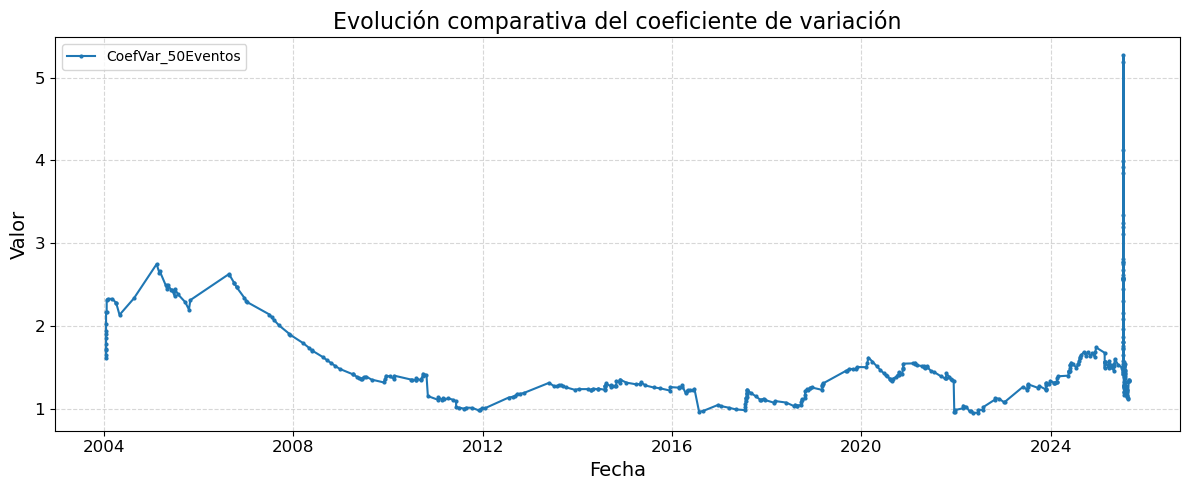

In [30]:
# Comparar evolución del coeficiente de variación
gra.plot_evolucion_multi(
   gdf_2002_12, 
   fecha_col="FechaHora", 
   param_cols=["CoefVar_50Eventos"], 
   titulo="Evolución comparativa del coeficiente de variación",
   
)

### 13. Número de terremotos en los últimos 30 días

In [31]:
# Contar eventos ocurridos en los últimos 30 días
gdf_2002_13 = par.contar_eventos_ultimos_T_dias(gdf_2002_12, fecha_col="FechaHora", T=30)

# Verificar
gdf_2002_13[["FechaHora", "NumEventosUltimos_30dias"]].tail(15)


,FechaHora,NumEventosUltimos_30dias
470,2025-08-08 06:34:10,87.0
471,2025-08-08 12:32:24,88.0
472,2025-08-08 23:50:40,89.0
473,2025-08-10 13:36:42,90.0
474,2025-08-10 21:14:18,91.0
475,2025-08-14 06:12:40,56.0
476,2025-08-14 07:21:07,57.0
477,2025-08-14 19:40:04,55.0
478,2025-08-16 01:29:58,48.0
479,2025-08-17 19:00:07,43.0


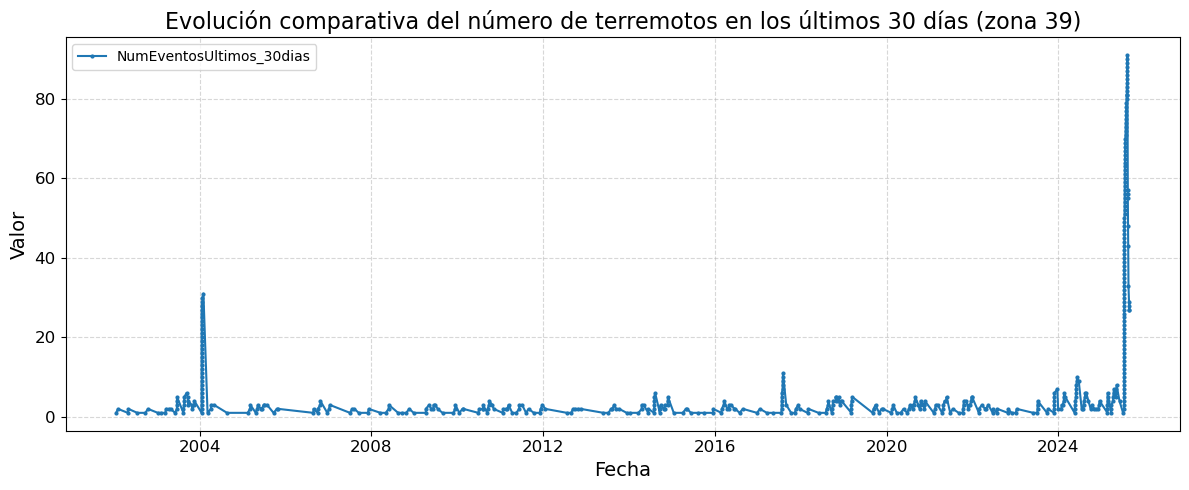

In [32]:
# Comparar evolución del número de terremotos en los últimos 30 días
filename = f"Evolución comparativa del número de terremotos en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_13, 
   fecha_col="FechaHora", 
   param_cols=["NumEventosUltimos_30dias"], 
   output_file=output_file,
   titulo=filename
)

## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Probabilidad de ocurrencia de un terremoto

In [33]:
# Cálculo de la magnitud de completitud
mc_opt = uti.estimar_mc_optimo(gdf_2002_13, col_mag="Mag_mbLgL", bins=0.1, threshold=0.9)

print('Magnitud de completitud: ', mc_opt)

Magnitud de completitud:  1.5977551020408163


In [34]:

# Cálculo de la probabilidad de ocurrencia de un terremoto para varias magnitudes

gdf_2002_14 = par.agregar_prob_ocurrencia(gdf_2002_13, ["b_lsq", "b_mlk"], M_list=[3.5, 4.0, 4.5], Mmin=mc_opt)

# Verificar
gdf_2002_14[["FechaHora", "b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5","b_mlk_prob_M3.5","b_mlk_prob_M4.0","b_mlk_prob_M4.5"]].tail(15)
#gdf_2002_14.tail(15)

,FechaHora,b_lsq_prob_M3.5,b_lsq_prob_M4.0,b_lsq_prob_M4.5,b_mlk_prob_M3.5,b_mlk_prob_M4.0,b_mlk_prob_M4.5
470,2025-08-08 06:34:10,0.024454,0.009220,0.003476,0.084005,0.043809,0.022846
471,2025-08-08 12:32:24,0.024036,0.009021,0.003386,0.080766,0.041687,0.021516
472,2025-08-08 23:50:40,0.023323,0.008685,0.003234,0.083463,0.043452,0.022622
473,2025-08-10 13:36:42,0.019990,0.007148,0.002556,0.060466,0.028923,0.013834
474,2025-08-10 21:14:18,0.019877,0.007097,0.002534,0.063998,0.031072,0.015086
475,2025-08-14 06:12:40,0.019912,0.007113,0.002541,0.063490,0.030761,0.014904
476,2025-08-14 07:21:07,0.020399,0.007333,0.002636,0.066040,0.032329,0.015827
477,2025-08-14 19:40:04,0.021141,0.007672,0.002784,0.068099,0.033608,0.016586
478,2025-08-16 01:29:58,0.019356,0.006863,0.002433,0.065528,0.032013,0.015640
479,2025-08-17 19:00:07,0.019243,0.006812,0.002412,0.062983,0.030451,0.014722


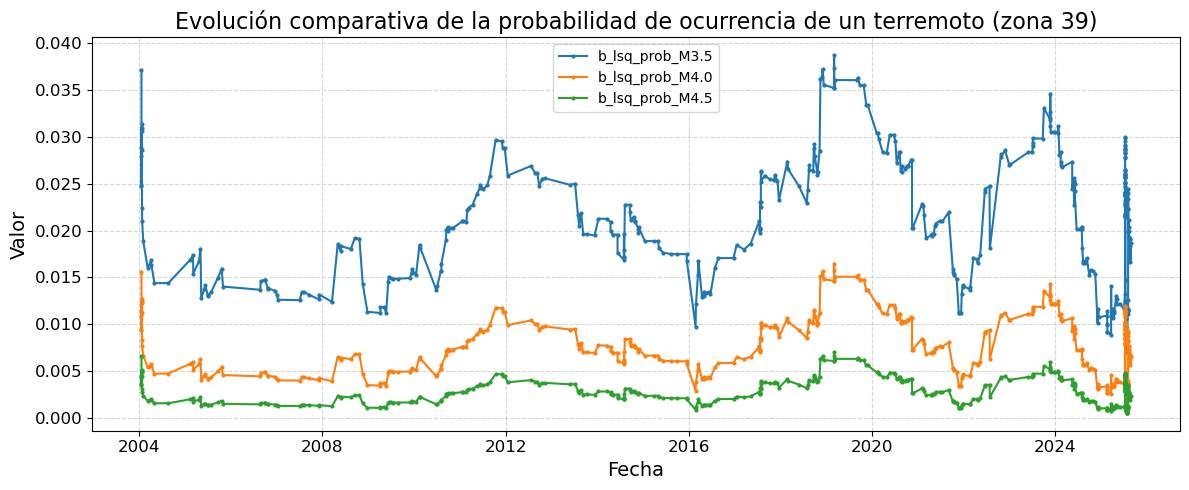

In [35]:
# Comparar evolución de la probabilidad de ocurrencia de un terremoto
filename = f"Evolución comparativa de la probabilidad de ocurrencia de un terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_14, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5"], 
   output_file=output_file,
   titulo=filename
)

### 2. Desviación de la Ley de Gutenberg-Richer
### a) Utiliza una ventana de T dias previos al evento seleccionado

In [36]:
gdf_2002_15 = par.eta_numba_vector(
    gdf_2002_14,
    fecha_col="FechaHora",
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    dias=30
)

gdf_2002_15[["FechaHora", "eta_T_lsq", "eta_T_mlk"]].tail()

,FechaHora,eta_T_lsq,eta_T_mlk
480,2025-08-20 03:38:46,0.565989,0.391141
481,2025-08-26 09:02:44,0.592621,0.411776
482,2025-08-26 22:05:23,0.632505,0.558495
483,2025-08-27 00:26:25,0.614523,0.476826
484,2025-08-27 14:09:51,0.598077,0.476746


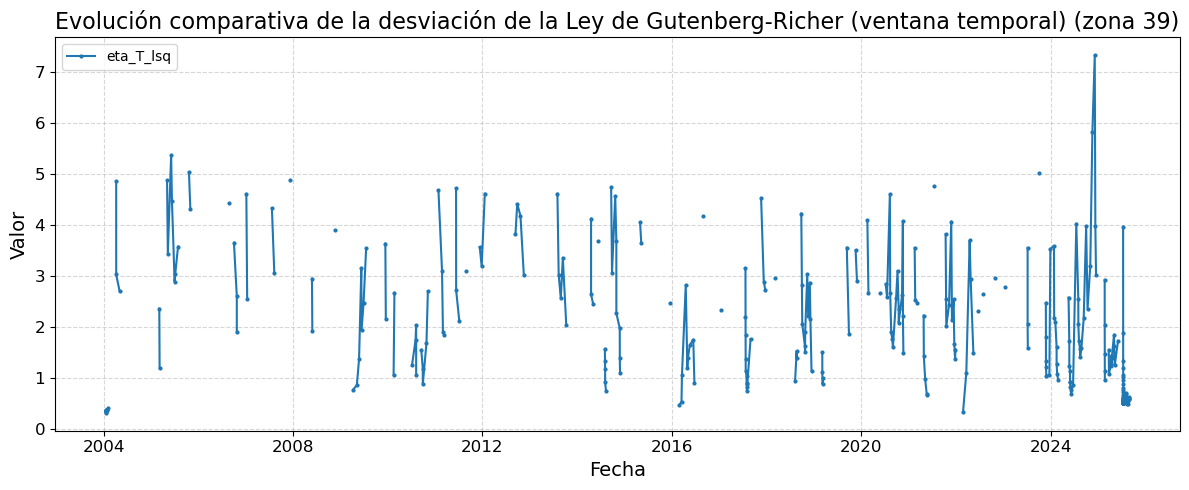

In [37]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana temporal)
  
filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_15, 
   fecha_col="FechaHora", 
   param_cols=["eta_T_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [38]:
gdf_2002_16 = par.eta_ventana_eventos(
    gdf_2002_15, 
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    n_eventos=50
)

gdf_2002_16[["FechaHora","eta_N_lsq", "eta_N_mlk"]].tail()

,FechaHora,eta_N_lsq,eta_N_mlk
480,2025-08-20 03:38:46,14.745420,5.180342
481,2025-08-26 09:02:44,14.747483,5.199833
482,2025-08-26 22:05:23,14.805239,5.239576
483,2025-08-27 00:26:25,14.800287,5.303441
484,2025-08-27 14:09:51,14.765788,5.325288


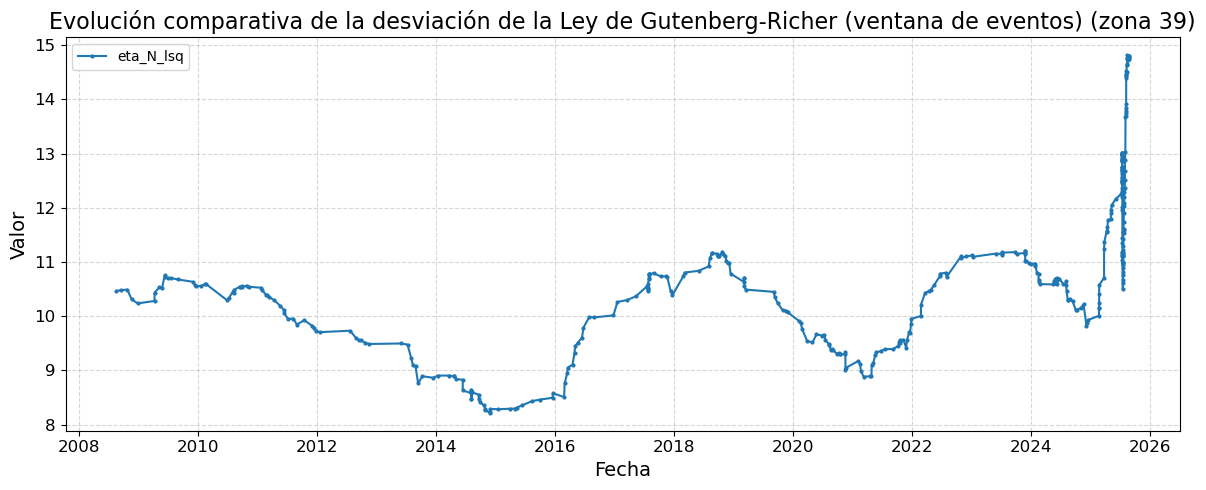

In [39]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana de eventos)

filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_16, 
   fecha_col="FechaHora", 
   param_cols=["eta_N_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 3. Desviación estándar del parámetro b

### a) Utiliza una ventana de T dias previos al evento seleccionado

In [40]:
# Por ventana de días
gdf_2002_17 = par.agregar_sigma_b_tiempo(gdf_2002_16, fecha_col="FechaHora", col_mag="Mag_mbLgL",
                                b_lsq="b_lsq", b_mlk="b_mlk", dias=30)

gdf_2002_17.tail()[["FechaHora", "sigma_b_lsq_30d", "sigma_b_mlk_30d"]]


,FechaHora,sigma_b_lsq_30d,sigma_b_mlk_30d
480,2025-08-20 03:38:46,0.151250,0.072851
481,2025-08-26 09:02:44,0.174419,0.084523
482,2025-08-26 22:05:23,0.188521,0.160063
483,2025-08-27 00:26:25,0.176146,0.113007
484,2025-08-27 14:09:51,0.170211,0.114567


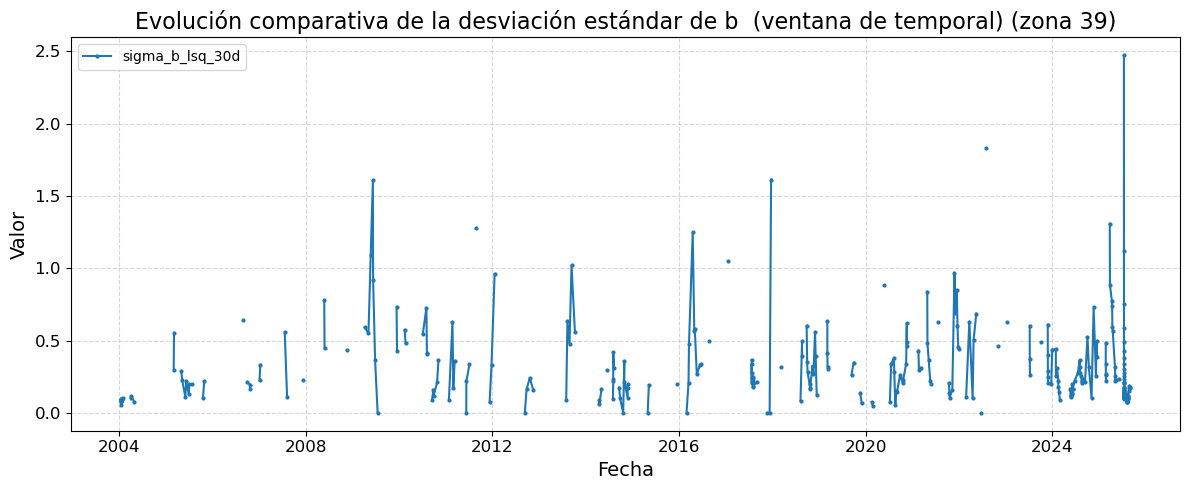

In [41]:
# Comparar evolución de la desviación estándar de b  (ventana de temporal)
filename = f"Evolución comparativa de la desviación estándar de b  (ventana de temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_17,
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_30d"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [42]:
# Por número de eventos
gdf_2002_18 = par.agregar_sigma_b_eventos(gdf_2002_17, col_mag="Mag_mbLgL", b_lsq="b_lsq", b_mlk="b_mlk", n_eventos=50)

gdf_2002_18.tail()[["FechaHora", "sigma_b_lsq_50ev", "sigma_b_mlk_50ev"]]
#gdf_2002_18.tail()

,FechaHora,sigma_b_lsq_50ev,sigma_b_mlk_50ev
480,2025-08-20 03:38:46,0.110946,0.053438
481,2025-08-26 09:02:44,0.107706,0.052194
482,2025-08-26 22:05:23,0.117694,0.099928
483,2025-08-27 00:26:25,0.112839,0.072392
484,2025-08-27 14:09:51,0.112595,0.075786


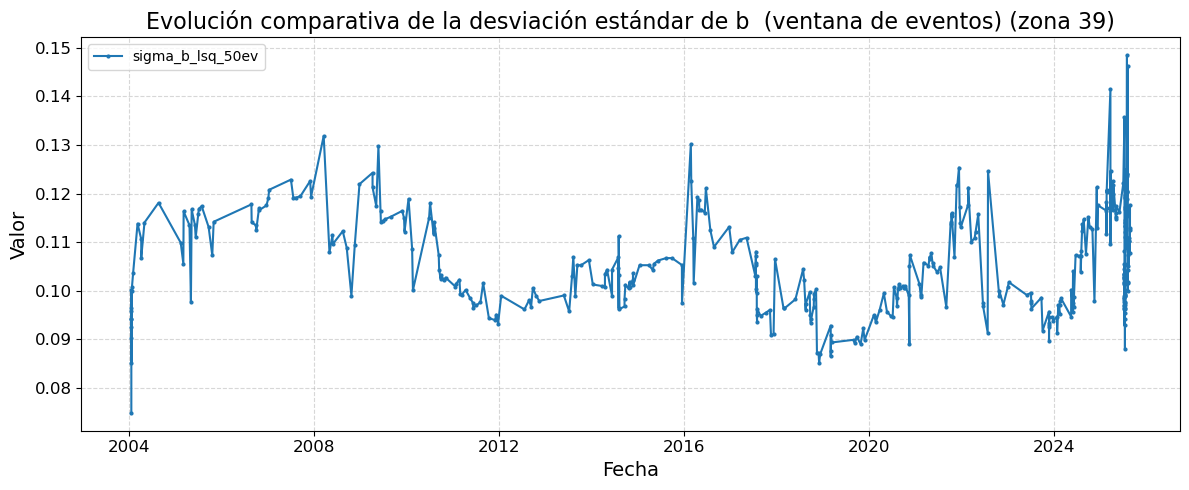

In [43]:
# Comparar evolución de la desviación estándar de b  (ventana de eventos)

filename = f"Evolución comparativa de la desviación estándar de b  (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_18, 
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_50ev"], 
   output_file=output_file,
   titulo=filename
)

### 4. Déficit de magnitud

### a) Utiliza el evento actual

In [44]:
gdf_2002_19 = par.agregar_deficit_evento(gdf_2002_18, col_mag="Mag_mbLgL")

gdf_2002_19.tail()[["FechaHora", "Mdef_evento_lsq", "Mdef_evento_mlk"]]


,FechaHora,Mdef_evento_lsq,Mdef_evento_mlk
480,2025-08-20 03:38:46,-1.659599,-2.207120
481,2025-08-26 09:02:44,-1.457879,-1.999296
482,2025-08-26 22:05:23,-2.025875,-2.071660
483,2025-08-27 00:26:25,-1.849400,-2.123742
484,2025-08-27 14:09:51,-1.043450,-1.276797


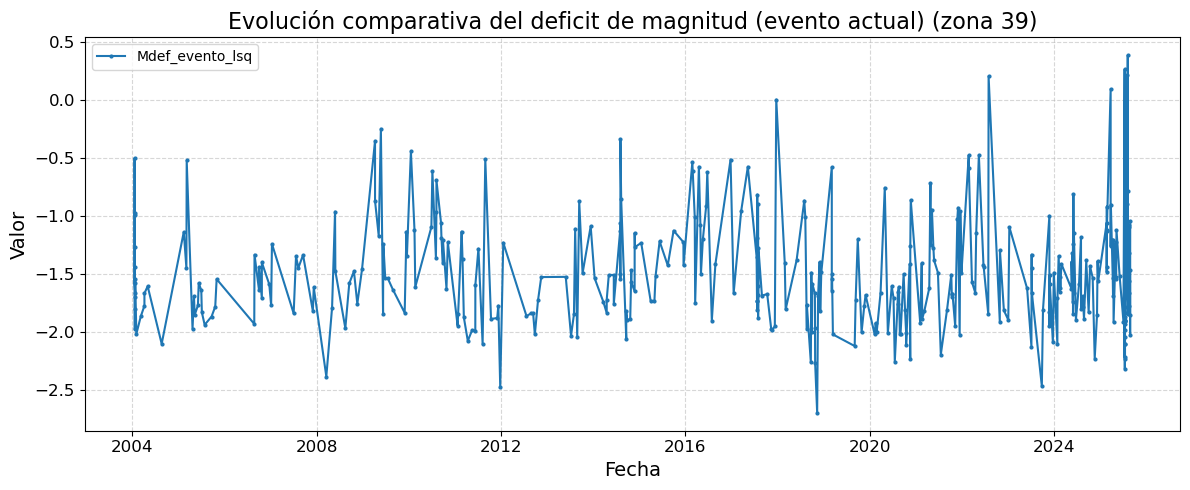

In [45]:
# Comparar evolución del deficit de magnitud (evento actual)

filename = f"Evolución comparativa del deficit de magnitud (evento actual) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_19, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_evento_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de T días previos al evento seleccionado

In [46]:
gdf_2002_20 = par.agregar_deficit_ventana_tiempo(gdf_2002_19, col_mag="Mag_mbLgL", fecha_col="FechaHora", T=180)

gdf_2002_20.tail()[["Mdef_Tdias_lsq","Mdef_Tdias_mlk"]]

,Mdef_Tdias_lsq,Mdef_Tdias_mlk
480,0.140401,-0.407120
481,0.142121,-0.399296
482,0.174125,0.128340
483,0.150600,-0.123742
484,0.156550,-0.076797


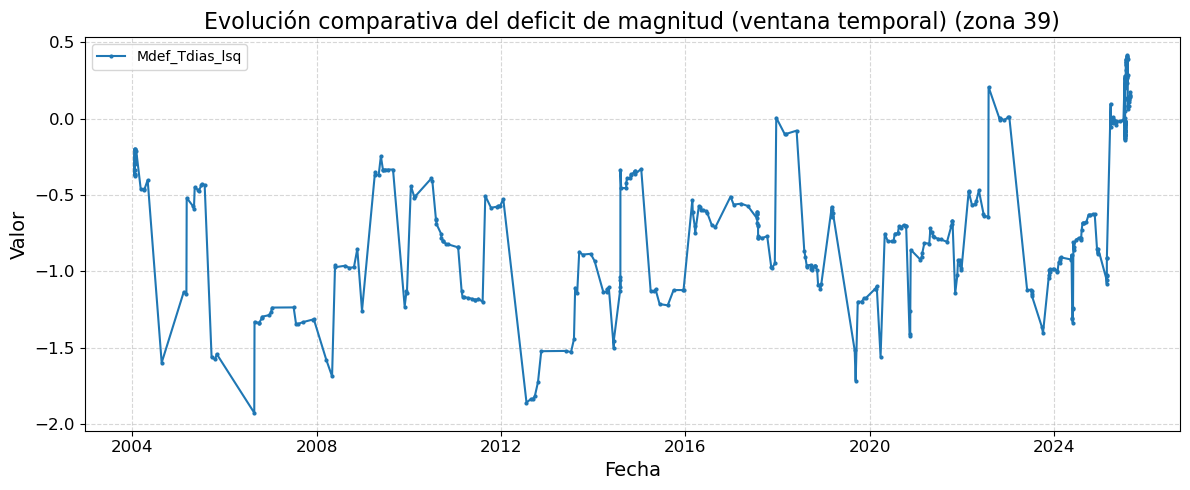

In [47]:
# Comparar evolución del deficit de magnitud (ventana temporal)

filename = f"Evolución comparativa del deficit de magnitud (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_20, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Tdias_lsq"], 
   output_file=output_file,
   titulo=filename
)

### c) Utiliza una ventana de N eventos previos al evento seleccionado

In [48]:
gdf_2002_21 = par.agregar_deficit_ventana_eventos(gdf_2002_20, col_mag="Mag_mbLgL", fecha_col="FechaHora", n_eventos=100)
gdf_2002_21.tail()[["Mdef_Neventos_lsq","Mdef_Neventos_mlk"]]

,Mdef_Neventos_lsq,Mdef_Neventos_mlk
480,0.140401,-0.407120
481,0.142121,-0.399296
482,0.174125,0.128340
483,0.150600,-0.123742
484,0.156550,-0.076797


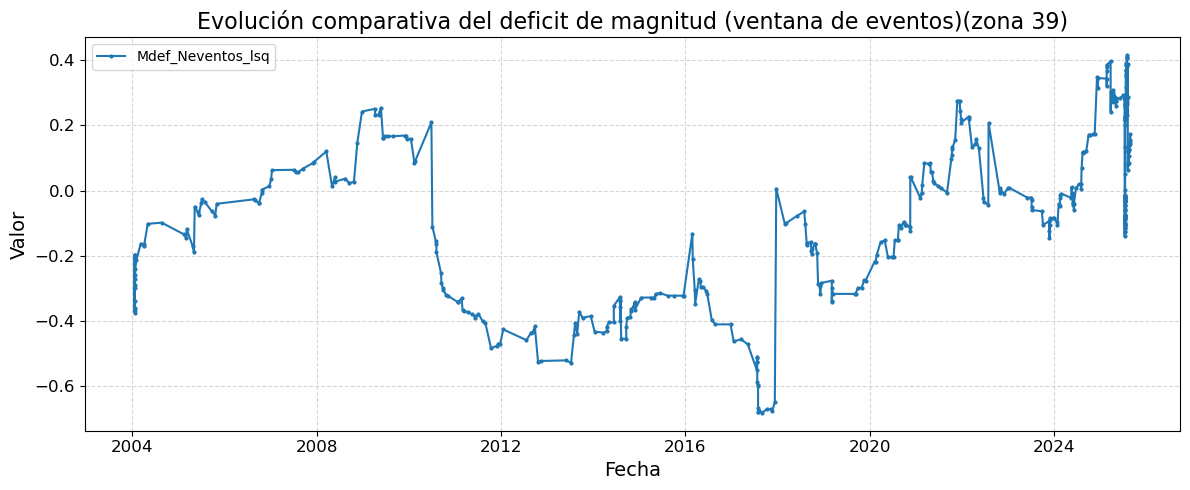

In [49]:
# Comparar evolución del deficit de magnitud (ventana de eventos)

filename = f"Evolución comparativa del deficit de magnitud (ventana de eventos)(zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_21, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Neventos_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 5. Tiempo de recurrencia total

La magnitud va desde 3.5 a 5.5 en intervalos de 0.1
a y b pueden tomar dos valores diferentes

In [50]:
gdf_2002_22 = par.agregar_tiempo_recurrencia(gdf_2002_21, fecha_col="FechaHora", Mmin=3.5, Mmax=5.5, step=0.1, unidad="años")

# Ver columnas nuevas
print(gdf_2002_22.filter(like="Trec_").tail())

     Trec_M3.5_lsq  Trec_M3.6_lsq  Trec_M3.7_lsq  Trec_M3.8_lsq  \
480      31.614072      38.932271      47.944527      59.042990   
481      31.726149      39.069081      48.111515      59.246795   
482      34.336237      42.586207      52.818398      65.509077   
483      32.388175      39.963892      49.311598      60.845768   
484      32.757211      40.388854      49.798487      61.400338   

     Trec_M3.9_lsq  Trec_M4.0_lsq  Trec_M4.1_lsq  Trec_M4.2_lsq  \
480      72.710586      89.542033     110.269715     135.795555   
481      72.959307      89.845542     110.640051     136.247393   
482      81.248948     100.770638     124.982805     155.012432   
483      75.077823      92.638811     114.307380     141.044310   
484      75.705142      93.342621     115.089209     141.902229   

     Trec_M4.3_lsq  Trec_M4.4_lsq  ...  Trec_M4.6_mlk  Trec_M4.7_mlk  \
480     167.230256     205.941636  ...      64.233836      74.220380   
481     167.781485     206.614058  ...      65.155

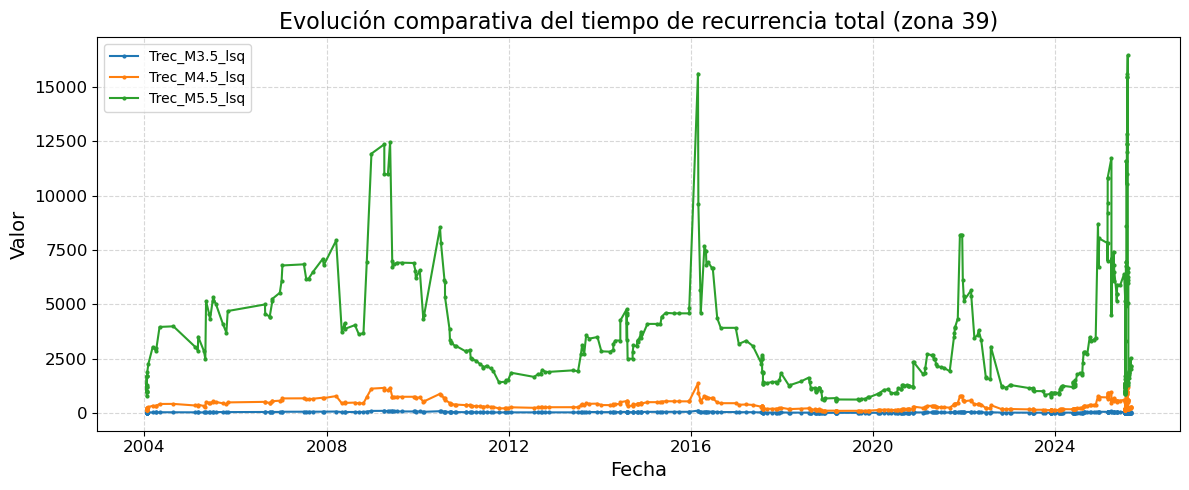

In [51]:
# Compar
filename = f"Evolución comparativa del tiempo de recurrencia total (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_22, 
   fecha_col="FechaHora", 
   param_cols=["Trec_M3.5_lsq","Trec_M4.5_lsq","Trec_M5.5_lsq"], 
   output_file=output_file,
   titulo=filename

)

### 6. Incremento del valor b

In [52]:

gdf_2002_23 = par.agregar_incrementos_b(gdf_2002_22, col_b1="b_lsq", col_b2="b_mlk")

# Ver las nuevas columnas

gdf_2002_23.filter(like="db_").tail()

,db_lsq_0_2,db_lsq_2_4,db_lsq_4_6,db_lsq_6_8,db_lsq_8_10,db_lsq_0_4,db_lsq_4_8,db_lsq_8_12,db_lsq_12_16,db_lsq_16_20,db_mlk_0_2,db_mlk_2_4,db_mlk_4_6,db_mlk_6_8,db_mlk_8_10,db_mlk_0_4,db_mlk_4_8,db_mlk_8_12,db_mlk_12_16,db_mlk_16_20
480,0.003683,0.011978,-0.005919,0.036505,0.010807,0.015661,0.030586,-0.009886,-0.151049,-0.104504,0.005395,0.001778,-0.007172,0.060629,0.001476,0.007172,0.053457,-0.012095,-0.024127,-0.015466
481,0.002207,0.021478,-0.013678,0.000895,0.042083,0.023685,-0.012783,0.024782,-0.150077,-0.111815,-0.001830,0.017832,-0.016002,-0.011140,0.066089,0.016002,-0.027142,0.059945,-0.029357,-0.010457
482,0.030870,0.003683,0.011978,-0.005919,0.036505,0.034552,0.006059,0.047312,-0.174767,0.022320,0.234102,0.005395,0.001778,-0.007172,0.060629,0.239497,-0.005395,0.062106,-0.046195,0.020001
483,0.008655,0.002207,0.021478,-0.013678,0.000895,0.010862,0.007800,0.042978,-0.175731,0.010368,0.101723,-0.001830,0.017832,-0.016002,-0.011140,0.099894,0.001830,0.054949,-0.033792,0.006740
484,-0.025616,0.030870,0.003683,0.011978,-0.005919,0.005253,0.015661,0.030586,-0.009886,-0.151049,-0.115485,0.234102,0.005395,0.001778,-0.007172,0.118617,0.007172,0.053457,-0.012095,-0.024127


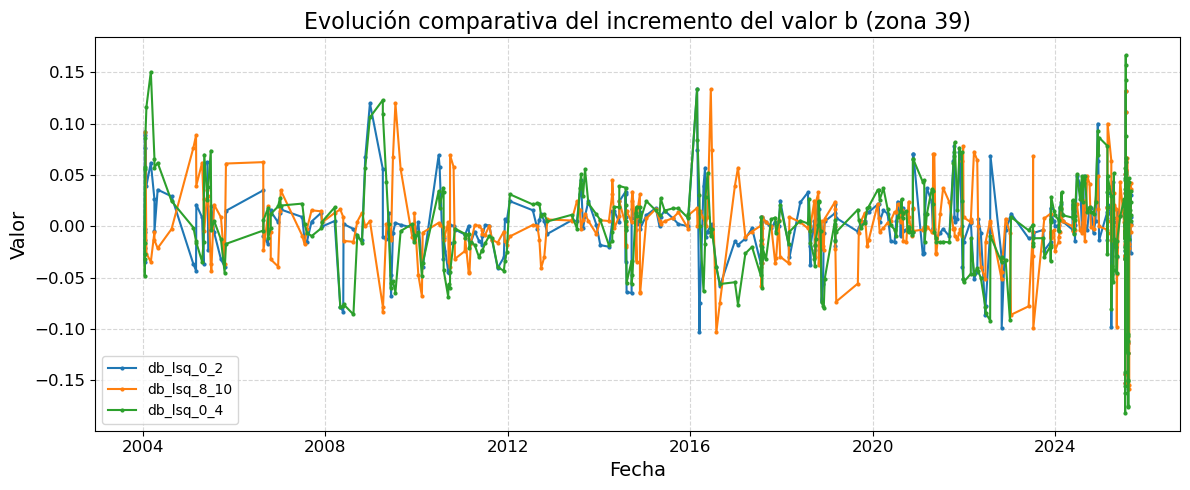

In [53]:
# Comparar evolución del incremento del valor b

filename = f"Evolución comparativa del incremento del valor b (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_23, 
   fecha_col="FechaHora", 
   param_cols=["db_lsq_0_2","db_lsq_8_10","db_lsq_0_4"], 
   output_file=output_file,
   titulo=filename

)

### 7. Coeficiente de agrupación

In [54]:


gdf_2002_24 = par.calcular_ccluster_aprox(
    gdf_2002_23,
    fecha_col="FechaHora",
    lat_col="Latitud",
    lon_col="Longitud",
    Tp_dias=30,
    eps_km=50,
    chunk_size=5000
 )

gdf_2002_24[["FechaHora", "Ccluster"]].tail()

Ccluster chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00, 26.92it/s]

,FechaHora,Ccluster
480,2025-08-20 03:38:46,0.761823
481,2025-08-26 09:02:44,0.764871
482,2025-08-26 22:05:23,0.764310
483,2025-08-27 00:26:25,0.764340
484,2025-08-27 14:09:51,0.764368


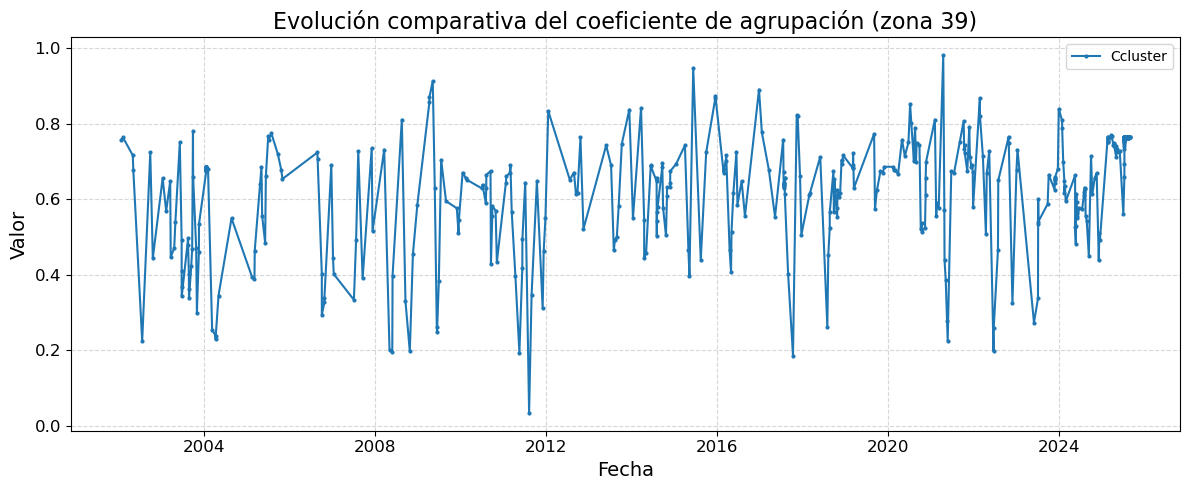

In [55]:
# Comparar evolución del coeficiente de agrupación

filename = f"Evolución comparativa del coeficiente de agrupación (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_24, 
   fecha_col="FechaHora", 
   param_cols=["Ccluster"], 
   output_file=output_file,
   titulo=filename
)

## GUARDA DATAFRAME  

In [56]:
# Guardar

filename = f"Dataframe_caracteristicas_entrada_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename
   
    
gdf_2002_24.to_pickle(output_file)
print(f"Guardado {filename} con {len(gdf_2002_24)} filas")


Guardado Dataframe_caracteristicas_entrada_zona_39.pkl con 485 filas
